<a href="https://www.kaggle.com/code/ankumagawa/optical-character-recognition-opencv-tesseract?scriptVersionId=101382140" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/invoice/invoice.png


In [2]:
# Install Library:

!pip install pytesseract
!pip install opencv-python
!pip install pillow


In [3]:
import pytesseract
import cv2
import matplotlib.pyplot as plt
from PIL import Image

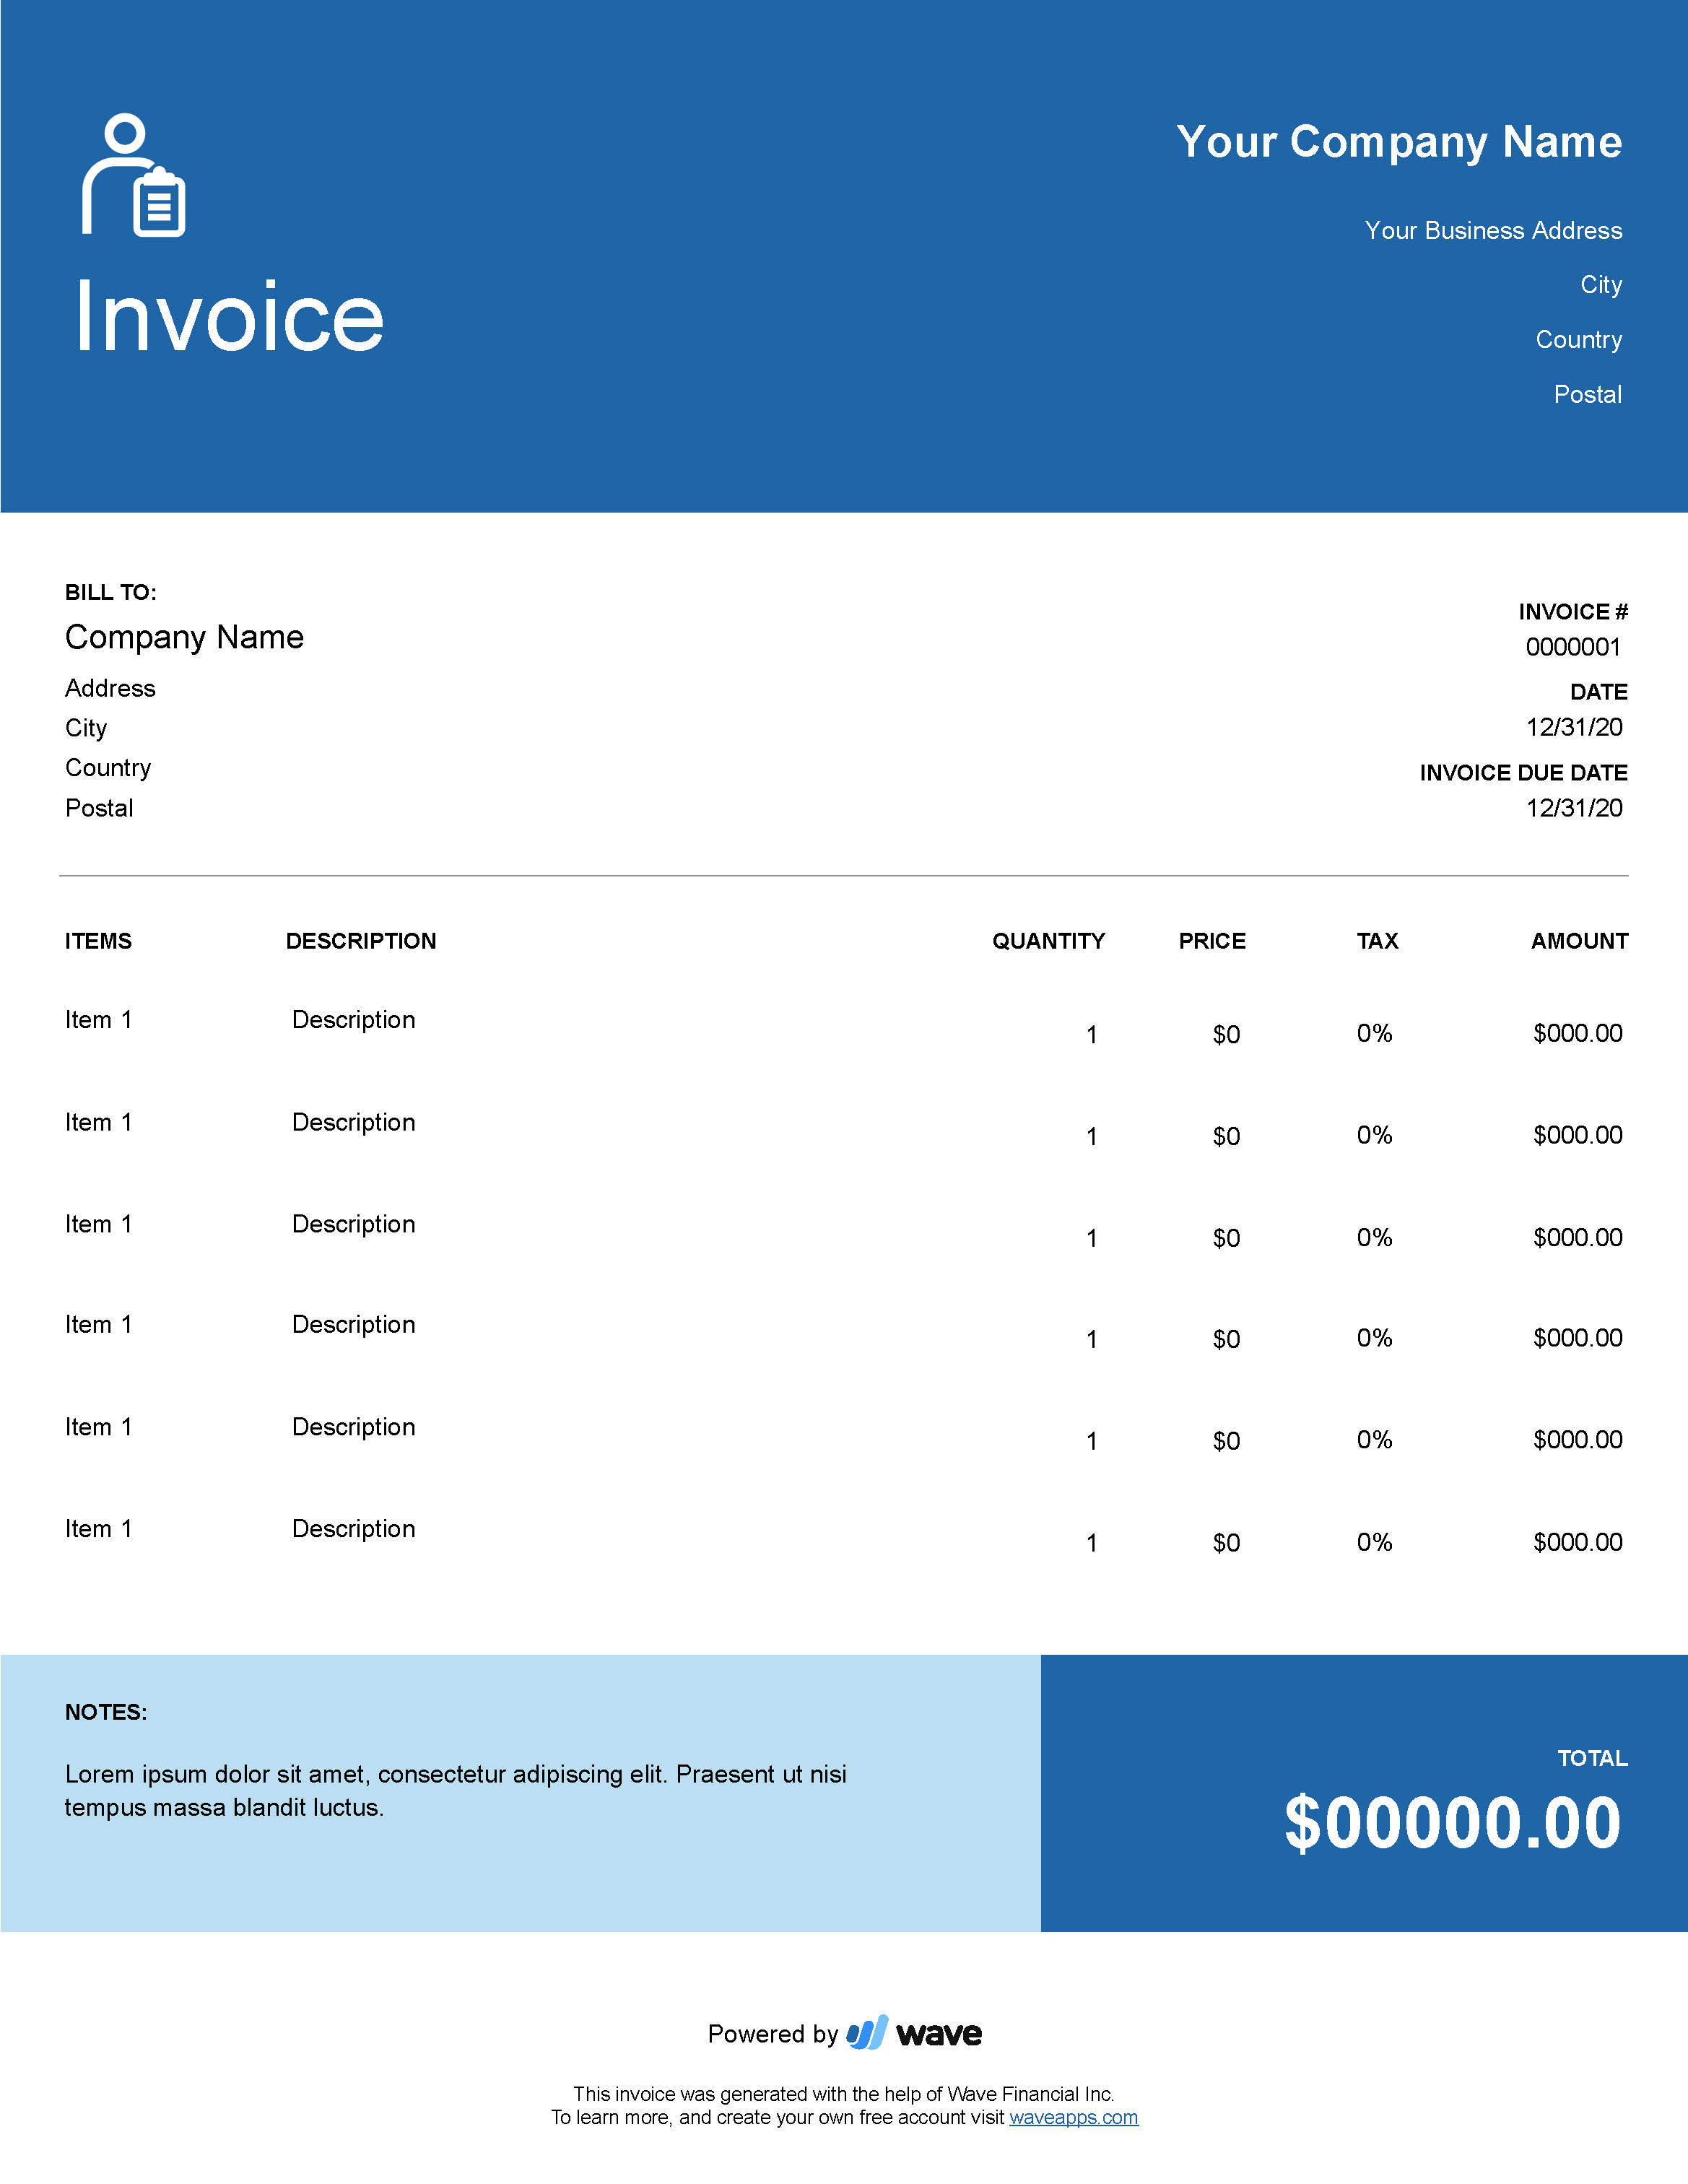

In [4]:
image = Image.open("../input/invoice/invoice.png")
image

In [5]:
import cv2 
import pytesseract

# I. Extract Text From Photo:

In [6]:
img = cv2.imread('../input/invoice/invoice.png')

custom_config = r'--oem 3 --psm 6'
text = pytesseract.image_to_string(img,config=custom_config)
print(text)

Oo Your Company Name
B Your Business Address
| “4 O74

Nn VO | as Country

Postal
BILL TO:
INVOICE #
Company Name 0000001
Address DATE
City 12/31/20
Country INVOICE DUE DATE
Postal 12/31/20
ITEMS DESCRIPTION QUANTITY PRICE TAX AMOUNT
Item 1 Description 1 $0 0% $000.00
Item 1 Description 1 $0 0% $000.00
Item 1 Description 1 $0 0% $000.00
Item 1 Description 1 $0 0% $000.00
Item 1 Description 1 $0 0% $000.00
Item 1 Description 4 $0 0% $000.00
NOTES:
Lorem ipsum dolor sit amet, consectetur adipiscing elit. Praesent ut nisi las
tempus massa blandit luctus. 00000 00
|
Powered by #f/ Wave
This invoice was generated with the help of Wave Financial Inc.
To learn more, and create your own free account visit waveapps.com



# II. DRAW BOXES AROUND THE TARGET WORD:

In [7]:
# make a copy of this image to draw in
image_copy = img.copy()
# the target word to search for
target_word = "Item"
# get all data from the image
data = pytesseract.image_to_data(img, output_type=pytesseract.Output.DICT)
print(data.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


In [8]:
display(data['text'])

['',
 '',
 '',
 '',
 'Oo',
 'Your',
 'Company',
 'Name',
 '',
 '',
 '',
 'B',
 'Your',
 'Business',
 'Address',
 '',
 '',
 '',
 'Invoice',
 'coun',
 '',
 '',
 '',
 'Postal',
 '',
 '',
 '',
 ' ',
 '',
 '',
 '',
 'BILL',
 'TO:',
 '',
 '',
 'INVOICE',
 '#',
 '',
 'Company',
 'Name',
 '0000001',
 '',
 'Address',
 'DATE',
 '',
 'City',
 '12/31/20',
 '',
 'Country',
 'INVOICE',
 'DUE',
 'DATE',
 '',
 'Postal',
 '12/31/20',
 '',
 'ITEMS',
 'DESCRIPTION',
 'QUANTITY',
 'PRICE',
 'TAX',
 'AMOUNT',
 '',
 'Item',
 '1',
 'Description',
 '1',
 '$0',
 '0%',
 '$000.00',
 '',
 'Item',
 '1',
 'Description',
 '1',
 '$0',
 '0%',
 '$000.00',
 '',
 'Item',
 '1',
 'Description',
 '1',
 '$0',
 '0%',
 '$000.00',
 '',
 'Item',
 '1',
 'Description',
 '1',
 '$0',
 '0%',
 '$000.00',
 '',
 'Item',
 '1',
 'Description',
 '1',
 '$0',
 '0%',
 '$000.00',
 '',
 'Item',
 '1',
 'Description',
 '1',
 '$0',
 '0%',
 '$000.00',
 '',
 'NOTES:',
 '',
 '',
 '',
 'TOTAL',
 '',
 '',
 '',
 'Lorem',
 'ipsum',
 'dolor',
 'sit',
 'am

In [9]:
# get all occurences of the that word
word_occurences = [ x for x, word in enumerate(data["text"]) if word == target_word ]
word_occurences

[63, 71, 79, 87, 95, 103]

In [10]:
for occ in word_occurences:
    # extract the width, height, top and left position for that detected word
    x = data["left"][occ]
    y = data["top"][occ]
    w = data["width"][occ]
    h = data["height"][occ]
    # draw the rectangular:
    image_copy = cv2.rectangle(image_copy, (x, y), (x + w, y + h), (0, 255, 0), 2)

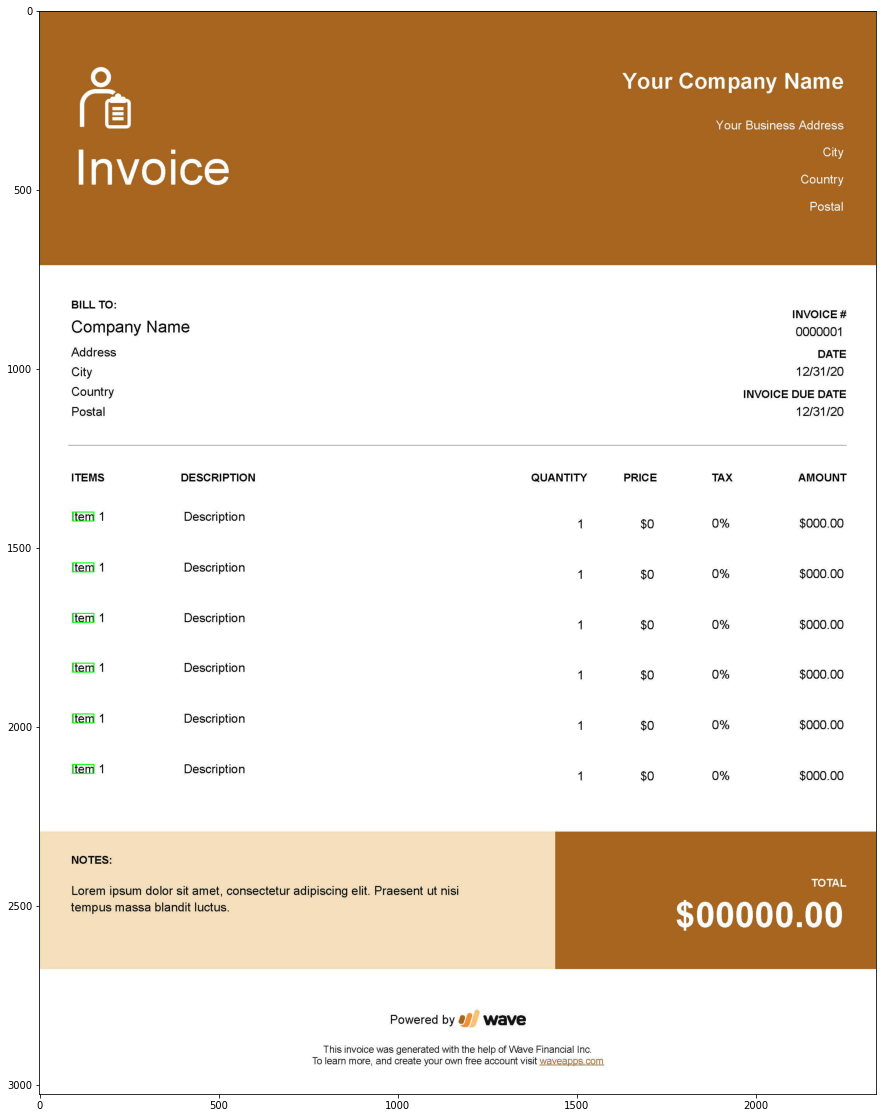

In [11]:
plt.imsave('all_item_word.png', image_copy)
plt.figure(figsize=(15,20))
plt.imshow(image_copy)
plt.show()
#cv2.waitKey(0)

## III. Getting boxes around all word:

In [12]:
image_all= img.copy()

In [13]:
n_boxes = len(data['text'])
for i in range(n_boxes):
    # extract the width, height, top and left position for that detected word
    x = data["left"][i]
    y = data["top"][i]
    w = data["width"][i]
    h = data["height"][i]
    # draw the rectangular:
    image_all = cv2.rectangle(image_all, (x, y), (x + w, y + h), (0, 255, 0), 2)
    

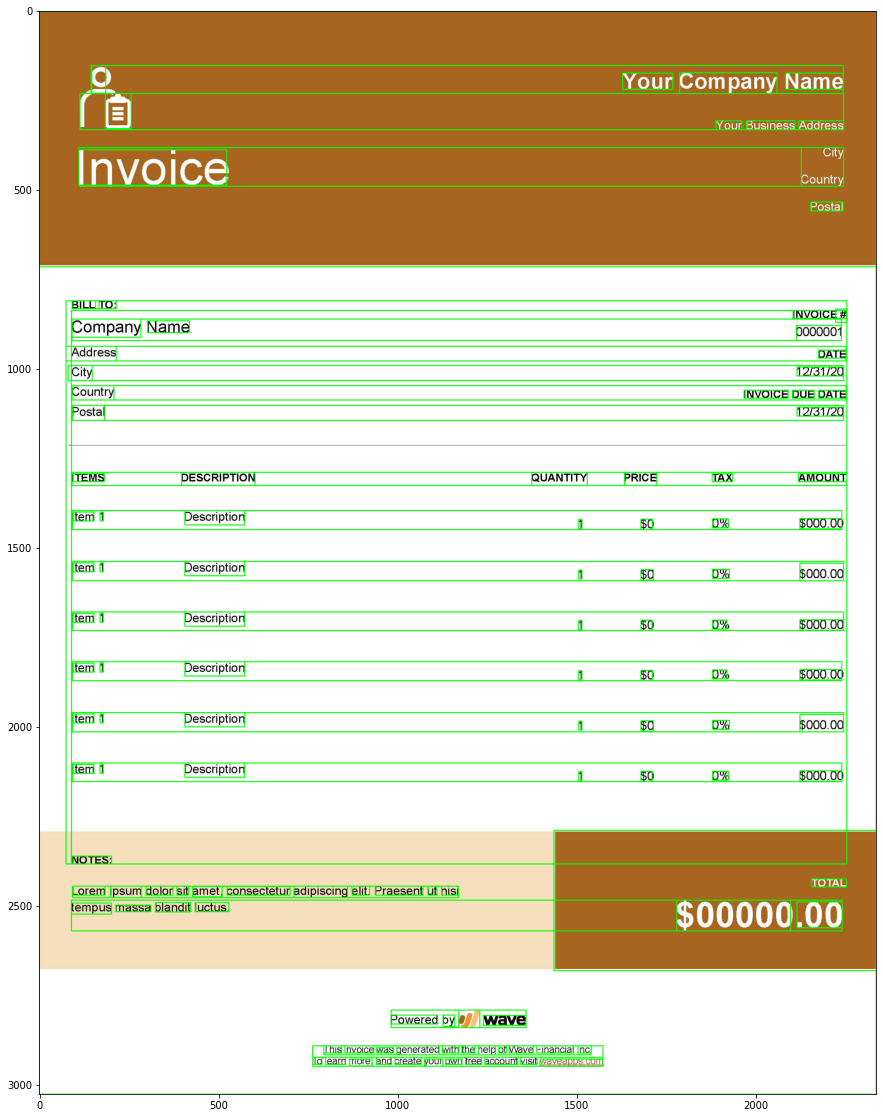

In [14]:
plt.imsave('image_all.png', image_all)
plt.figure(figsize=(15,20))
plt.imshow(image_all)
plt.show()


# IV.  Getting boxes around all single character:

In [15]:
import cv2
import pytesseract

img = cv2.imread('../input/invoice/invoice.png')

h, w, c = img.shape
boxes = pytesseract.image_to_boxes(img) 
for b in boxes.splitlines():
    b = b.split(' ')
    img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)




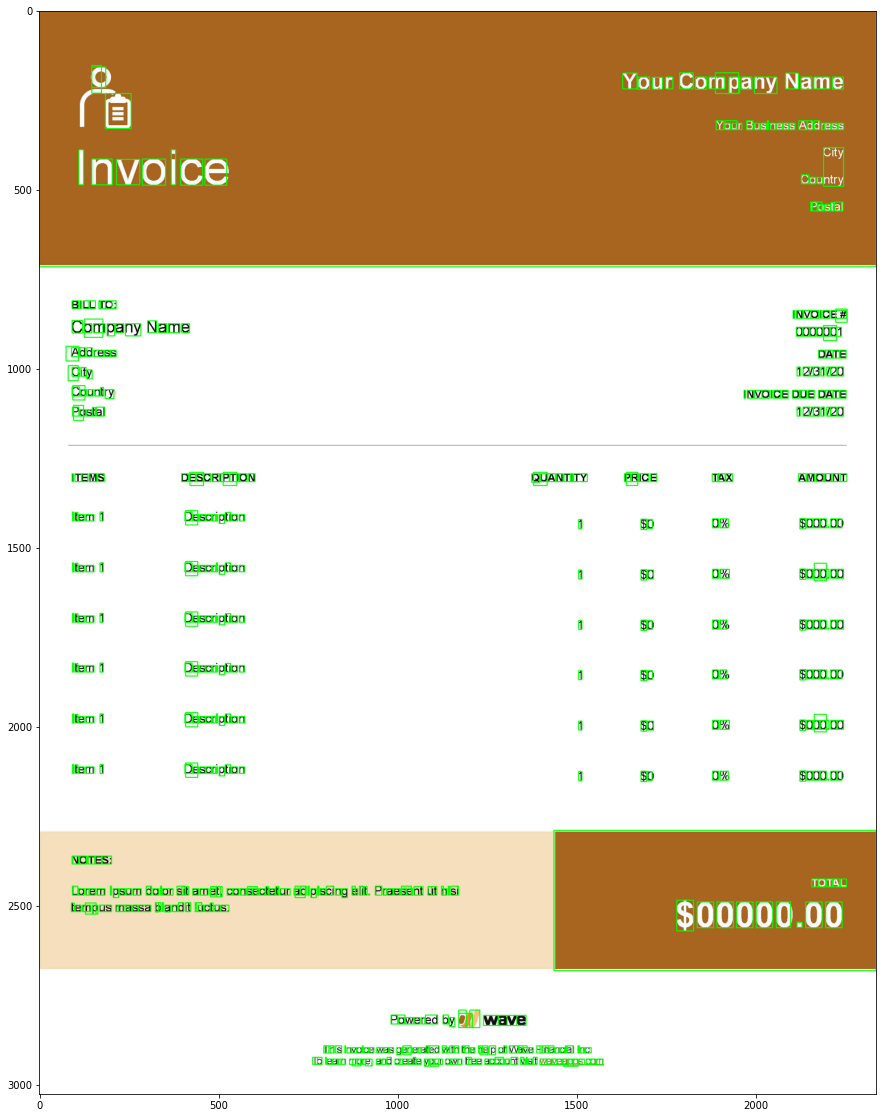

In [16]:
plt.figure(figsize=(15,20))
plt.imshow(img)
plt.show()

# V. Detect Only Digit:


In [17]:
custom_config = r'--oem 3 --psm 6 outputbase digits'
num= pytesseract.image_to_string(img, config=custom_config)
print(num)

-

. -
1
4
000007
220
220
50 000.00
2 0000
0 0 000.00
50 0 000.00
00000
0 000.00

.
00000
0 0 0 0 . 0 0

0
0



# VI. Detect Only Text:

In [18]:
custom_config = r'-c tessedit_char_whitelist=abcdefghijklmnopqrstuvwxyz --psm 6'
text = pytesseract.image_to_string(img, config=custom_config)
print(text)

n ee
ourompanyame
s
ourusnessddress
ci
nvo
a adted ountry
i
e
omipanyame ponod
didress ae
iity hv
vountry oe
osial hv
es e e
temf descrption q a
temf escription j re orm sd
temf escription q g
temf escription q
temf descrption j re on sd
temf escrption j g a
onemlpsumdolonsitametconsectetonadlpiscingelitpraesantuthisi
fernpusmassablandiftctos
u
oweredbywave
lslowoloswasgederatiedviththefeidofaleifeinolalfaci
leannqoreaodooeaiisoonownfiesachooniiieiimaragonsicom



Reference:

  https://nanonets.com/blog/ocr-with-tesseract/#tesseract-ocr
  
  https://www.thepythoncode.com/article/optical-character-recognition-pytesseract-python#:~:text=Optical%20Character%20Recognition%20is%20the,language)%20as%20a%20string%20variable.
  
  https://www.analyticsvidhya.com/blog/2021/06/optical-character-recognitionocr-with-tesseract-opencv-and-python/
  
  https://www.topcoder.com/thrive/articles/python-for-character-recognition-tesseract